In [77]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os

sns.set(rc={'figure.figsize':(20,14)})

In [78]:
data_folder = "../data/columncompression20210225"

os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
high_level = high_level.sort_values("benchmark_run_name")
# high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name
5,./tpch_bitpacking_compactvector_f_singlethread...,1.294633e+08,18.732066,bitpacking_compactvector_16
3,./tpch_bitpacking_compactvector_singlethreaded...,1.327210e+08,17.717648,bitpacking_compactvector
6,./tpch_bitpacking_simdcai_seq_singlethreaded.json,1.652387e+08,13.169970,for_SIMDCAI_simd_seq
0,./tpch_bitpacking_simdcai_singlethreaded.json,1.634912e+08,12.956584,for_SIMDCAI_simd
7,./tpch_bitpacking_turbopfor_seq_singlethreaded...,1.465483e+08,15.330915,bitpacking_turboPFOR_seq
8,./tpch_bitpacking_turbopfor_singlethreaded.json,1.260748e+08,19.580211,bitpacking_turboPFOR
1,./tpch_compressionUnencoded_singlethreaded.json,1.275938e+08,19.882862,unencoded_Hyrise
4,./tpch_dictionary_singlethreaded.json,1.213889e+08,21.256181,bytepacking_Hyrise_fsba
2,./tpch_simdbp_singlethreaded.json,2.151083e+08,11.187778,simdbp128_Hyrise


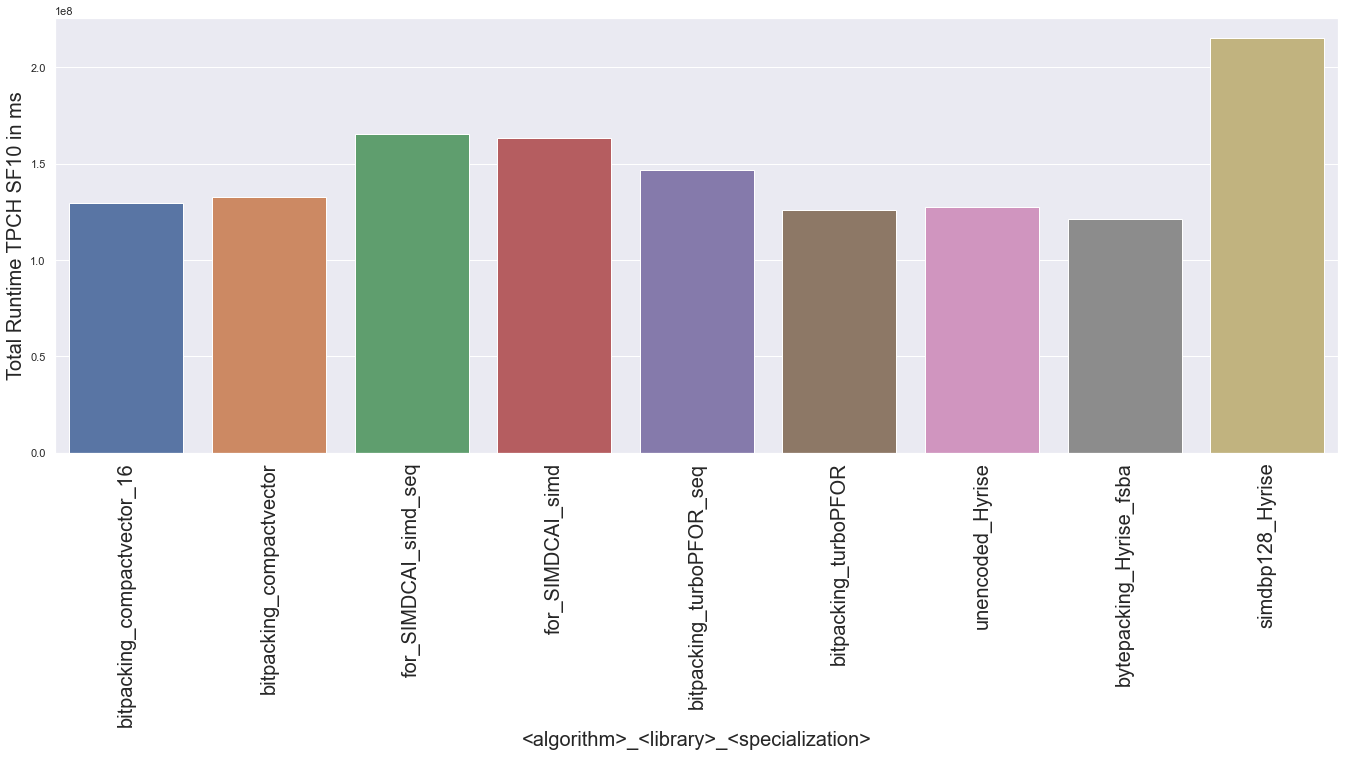

In [79]:
   
# https://stackoverflow.com/questions/28904397/how-to-set-the-value-of-the-axis-multiplier-in-matplotlib
class MagnitudeFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, exponent=None):
        super().__init__()
        self._fixed_exponent = exponent

    def _set_order_of_magnitude(self):
        if self._fixed_exponent:
            self.orderOfMagnitude = self._fixed_exponent
        else:
            super()._set_order_of_magnitude()

sns.set(rc={'figure.figsize':(23,8)})

high_level["LTO"] = high_level["benchmark_run_name"].str.match(".*LTO.*")
plot = sns.barplot(data=high_level, x="fancy_name", y="total_runtime")
plot.set_xlabel("<algorithm>_<library>_<specialization>",fontsize=20)
plot.set_ylabel("Total Runtime TPCH SF10 in ms",fontsize=20)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90, fontsize=20)

#for ax in plot.axes.flat:
# ax.yaxis.set_major_formatter(MagnitudeFormatter(6))
plt.savefig(f"visualizations/tpch_compression_high_level_both.svg", format="svg")

#plot_high_level(
 #   high_level[high_level["benchmark_run_name"].str.match(".*LTO.*")],
 #   "tpch_compression_high_level_with_lto")

In [80]:
low_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_low_level.csv")
low_level = low_level.sort_values("query_name")
low_level = low_level[~low_level["benchmark_run_name"].str.match(".*(simdbp|dict).*")]
low_level["fancy_name"] = [fancy_name(b) for b in low_level["benchmark_run_name"]]
low_level["query_name"] = [b.replace("TPC-H ", "") for b in low_level["query_name"]]
low_level

,benchmark_run_name,query_name,avg_duration,throughput,fancy_name
0,./tpch_bitpacking_simdcai_singlethreaded.json,01,6.397244e+08,1.563160,for_SIMDCAI_simd
176,./tpch_bitpacking_turbopfor_singlethreaded.json,01,4.983939e+08,2.006419,bitpacking_turboPFOR
154,./tpch_bitpacking_turbopfor_seq_singlethreaded...,01,6.749474e+08,1.481583,bitpacking_turboPFOR_seq
22,./tpch_compressionUnencoded_singlethreaded.json,01,4.951459e+08,2.019581,unencoded_Hyrise
66,./tpch_bitpacking_compactvector_singlethreaded...,01,5.294749e+08,1.888644,bitpacking_compactvector
...,...,...,...,...,...
87,./tpch_bitpacking_compactvector_singlethreaded...,22,3.371404e+07,29.657176,bitpacking_compactvector
153,./tpch_bitpacking_simdcai_seq_singlethreaded.json,22,4.308170e+07,23.208509,for_SIMDCAI_simd_seq
21,./tpch_bitpacking_simdcai_singlethreaded.json,22,4.216660e+07,23.713017,for_SIMDCAI_simd
43,./tpch_compressionUnencoded_singlethreaded.json,22,3.102096e+07,32.231730,unencoded_Hyrise


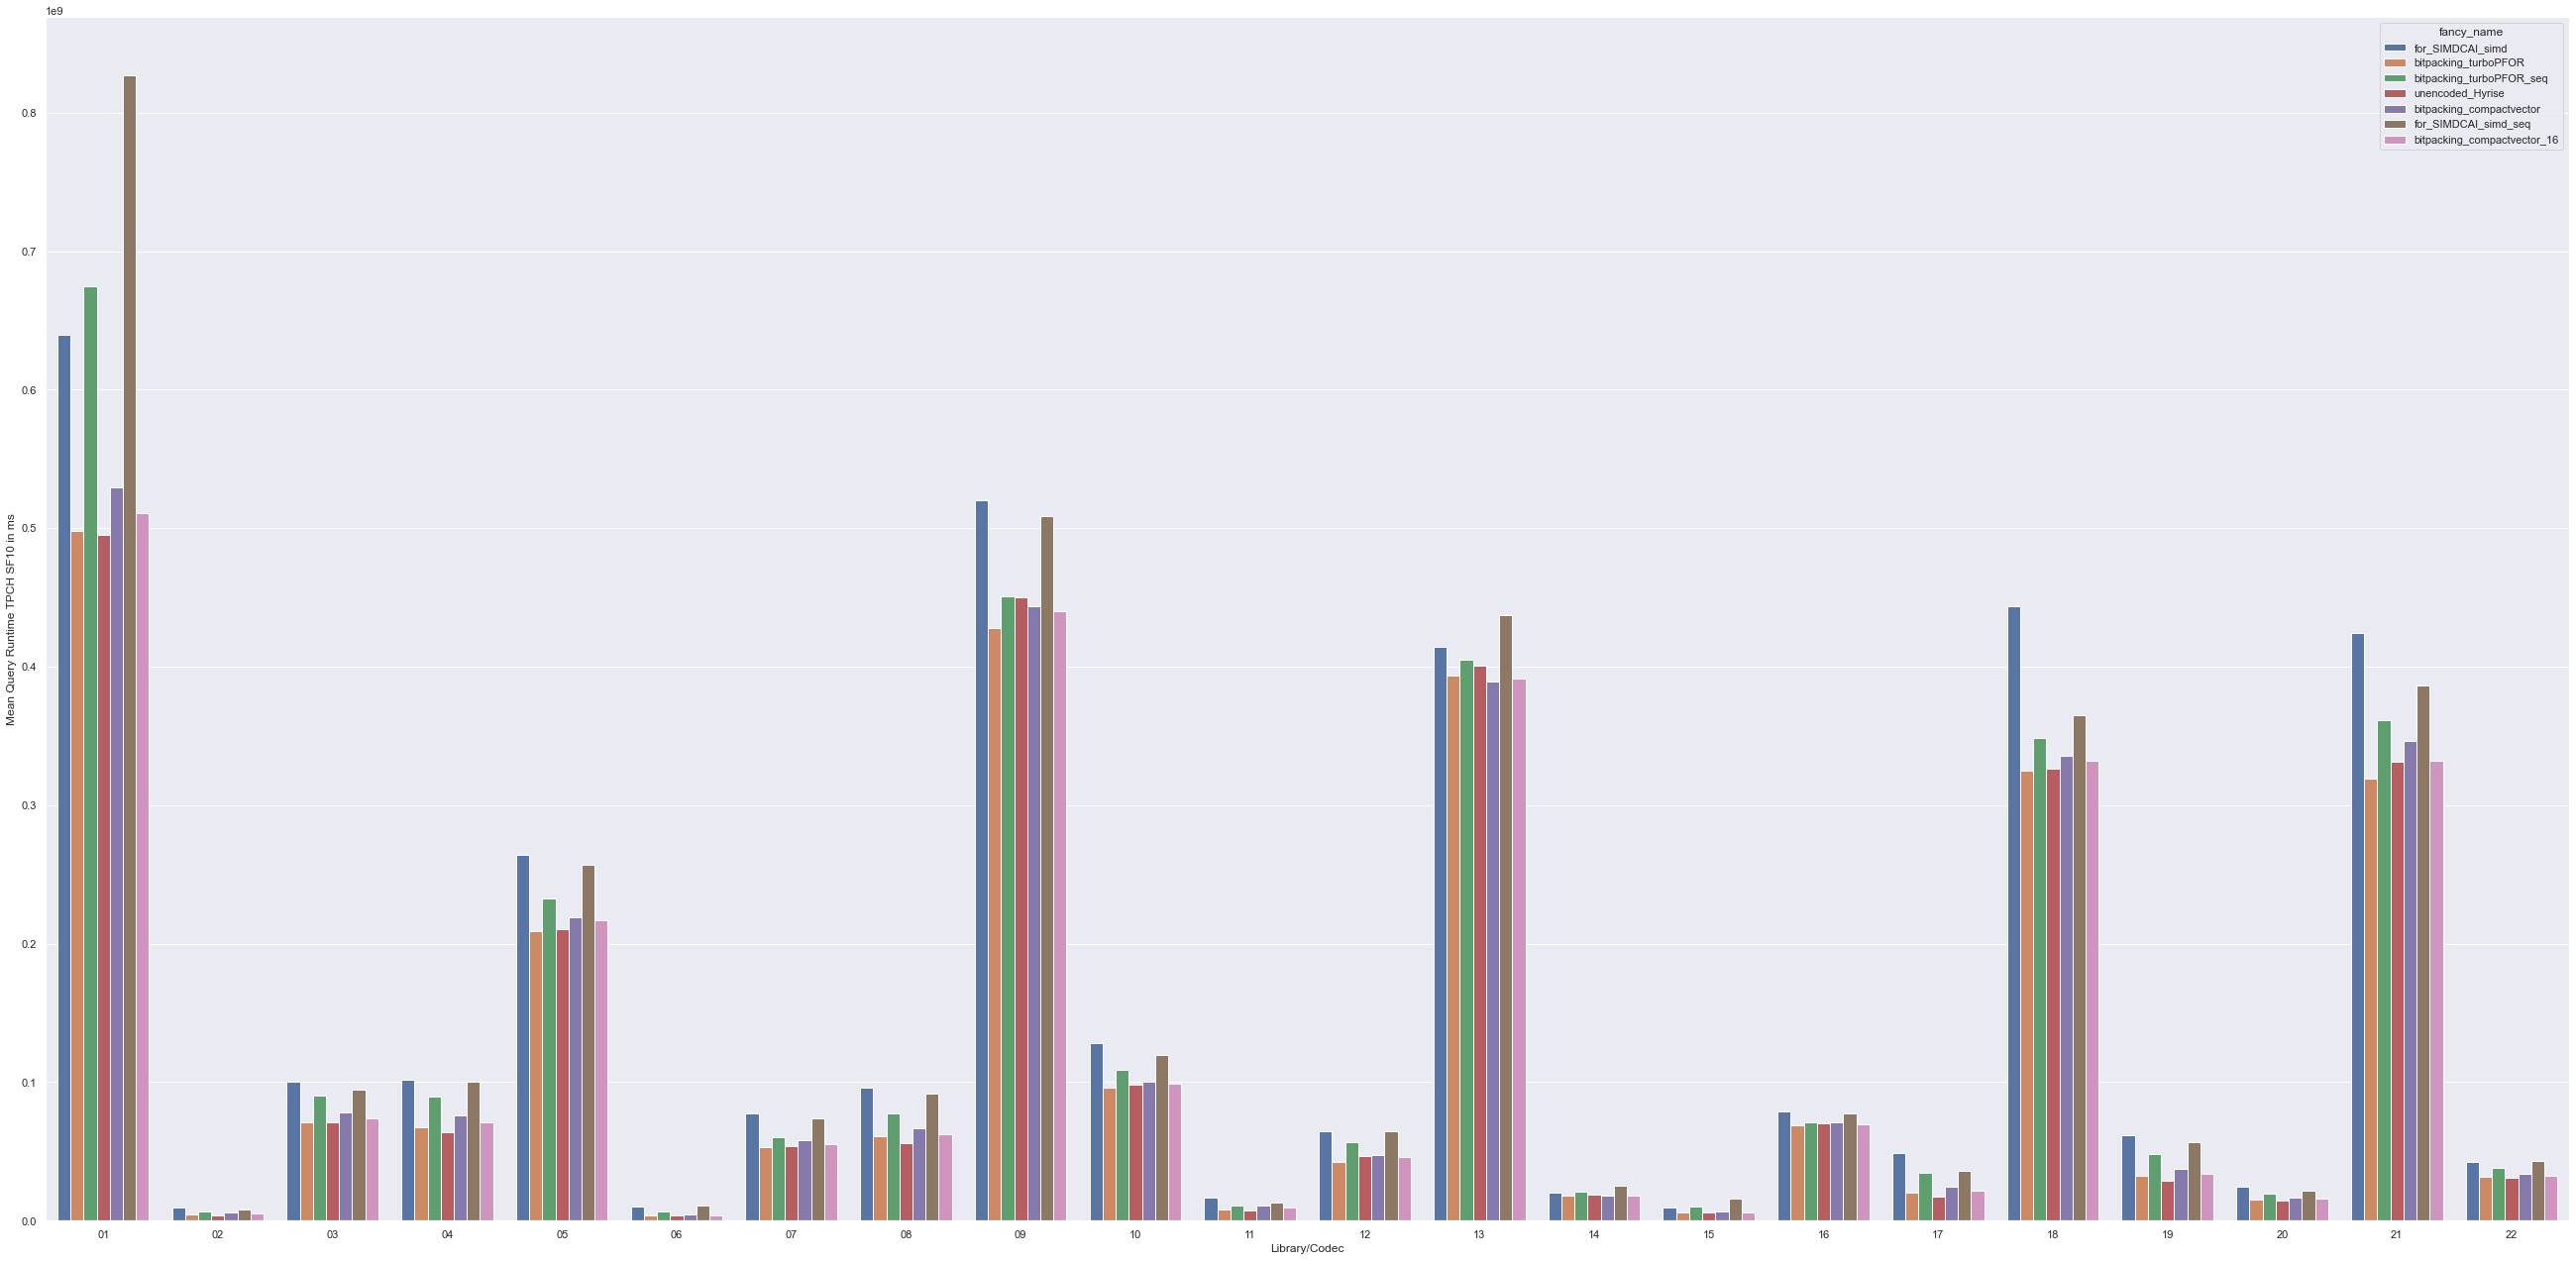

In [81]:
plot = sns.catplot(data=low_level, x="query_name", y="avg_duration", kind="bar", hue="fancy_name", legend_out=False)
plot.set_axis_labels("Library/Codec", "Mean Query Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(40,20)
for ax in plot.axes.flat:
    ax.yaxis.set_major_formatter(MagnitudeFormatter(9))
plt.savefig(f"visualizations/tpch_compression_low_level_absolute.svg", format="svg")

In [82]:
low_level_nolto = low_level[~low_level["benchmark_run_name"].str.match(".*(LTO).*")]
default_query_durations = low_level_nolto[low_level_nolto["benchmark_run_name"].str.match(".*Unencoded.*")]

low_level_nolto = low_level_nolto.merge(default_query_durations, how="left", left_on="query_name", right_on="query_name")
low_level_nolto["duration_percentage"] = low_level_nolto["avg_duration_x"] / low_level_nolto["avg_duration_y"]
low_level_nolto_nodefault = low_level_nolto[~low_level_nolto["benchmark_run_name_x"].str.match(".*unencoded.*")]

low_level_nolto_nodefault

,benchmark_run_name_x,query_name,avg_duration_x,throughput_x,fancy_name_x,benchmark_run_name_y,avg_duration_y,throughput_y,fancy_name_y,duration_percentage
0,./tpch_bitpacking_simdcai_singlethreaded.json,01,6.397244e+08,1.563160,for_SIMDCAI_simd,./tpch_compressionUnencoded_singlethreaded.json,4.951459e+08,2.019581,unencoded_Hyrise,1.291992
1,./tpch_bitpacking_turbopfor_singlethreaded.json,01,4.983939e+08,2.006419,bitpacking_turboPFOR,./tpch_compressionUnencoded_singlethreaded.json,4.951459e+08,2.019581,unencoded_Hyrise,1.006560
2,./tpch_bitpacking_turbopfor_seq_singlethreaded...,01,6.749474e+08,1.481583,bitpacking_turboPFOR_seq,./tpch_compressionUnencoded_singlethreaded.json,4.951459e+08,2.019581,unencoded_Hyrise,1.363128
3,./tpch_compressionUnencoded_singlethreaded.json,01,4.951459e+08,2.019581,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,4.951459e+08,2.019581,unencoded_Hyrise,1.000000
4,./tpch_bitpacking_compactvector_singlethreaded...,01,5.294749e+08,1.888644,bitpacking_compactvector,./tpch_compressionUnencoded_singlethreaded.json,4.951459e+08,2.019581,unencoded_Hyrise,1.069331
...,...,...,...,...,...,...,...,...,...,...
149,./tpch_bitpacking_compactvector_singlethreaded...,22,3.371404e+07,29.657176,bitpacking_compactvector,./tpch_compressionUnencoded_singlethreaded.json,3.102096e+07,32.231730,unencoded_Hyrise,1.086815
150,./tpch_bitpacking_simdcai_seq_singlethreaded.json,22,4.308170e+07,23.208509,for_SIMDCAI_simd_seq,./tpch_compressionUnencoded_singlethreaded.json,3.102096e+07,32.231730,unencoded_Hyrise,1.388793
151,./tpch_bitpacking_simdcai_singlethreaded.json,22,4.216660e+07,23.713017,for_SIMDCAI_simd,./tpch_compressionUnencoded_singlethreaded.json,3.102096e+07,32.231730,unencoded_Hyrise,1.359294
152,./tpch_compressionUnencoded_singlethreaded.json,22,3.102096e+07,32.231730,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,3.102096e+07,32.231730,unencoded_Hyrise,1.000000


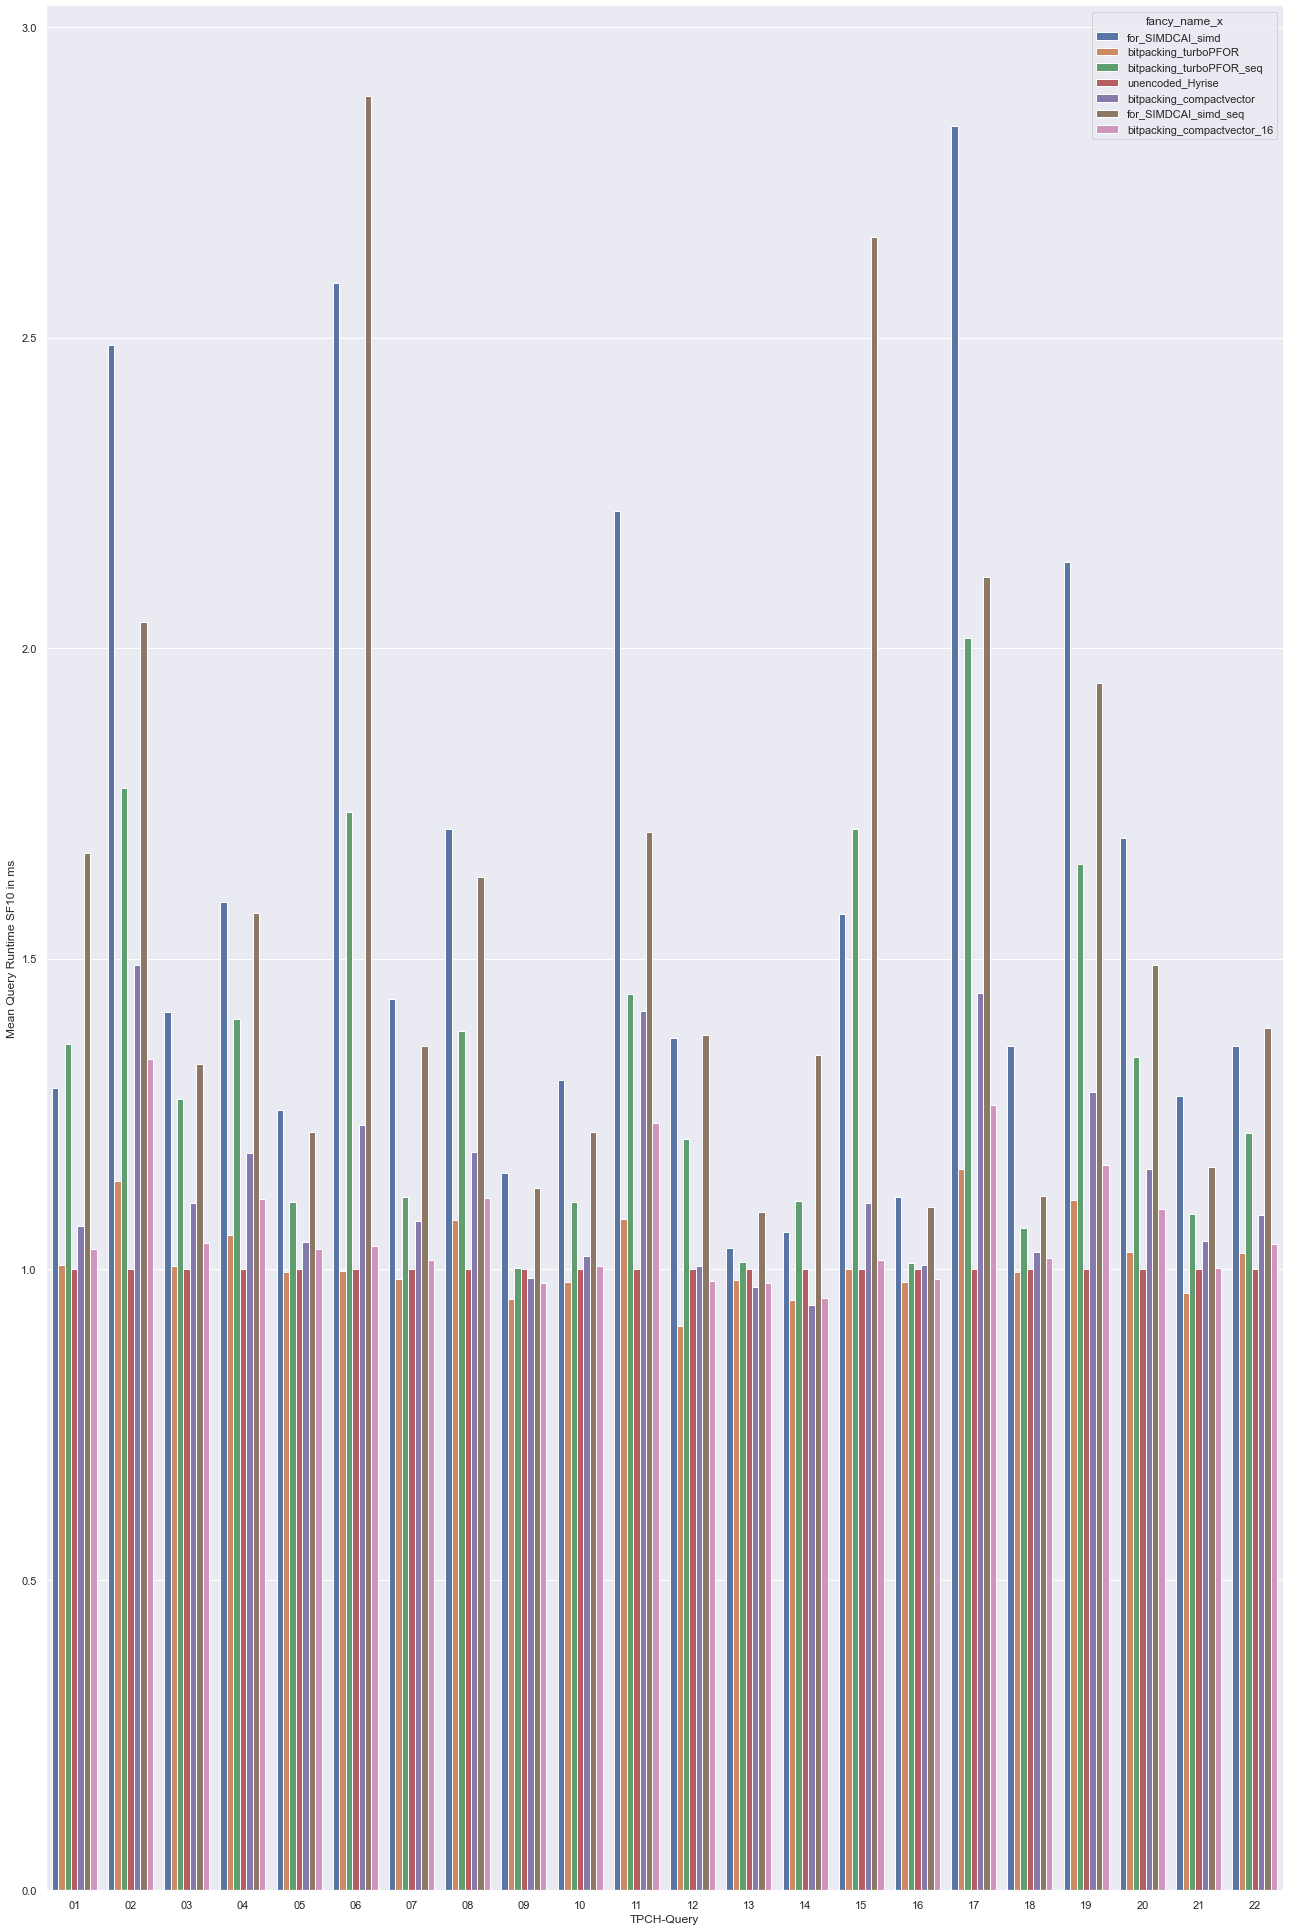

In [83]:

plot = sns.catplot(data=low_level_nolto_nodefault, x="query_name", y="duration_percentage", kind="bar", hue="fancy_name_x", legend_out=False)
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,30)
plt.savefig(f"visualizations/tpch_compression_low_level_percentage.svg", format="svg")